In [ ]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
R = 20.0e3
C = 10.0e-6
tau = R*C
Tsim = 2

# cria a função transferência em malha aberta
numerador = [1/tau]
denominador = [1, 1/tau]
P_s = ctl.tf(numerador,denominador)

# cria a função transferência do controlador
C_s = ctl.tf([3],[1])

#cria a função transferência do sensor
H_s = ctl.tf([1],[1])

In [ ]:
# função transferência em MF
# G1_s = C_s*P_S/(1 + C_s*P_s*H_s)
G_s = ctl.series(C_s, P_s)
G1_s = ctl.feedback(G_s, H_s, sign=-1)

In [ ]:
# calcula a resposta ao degrau unitário
T_mf, yout_mf = ctl.step_response(G1_s, Tsim)

In [ ]:
# calcula um degrau unitário
T2 = np.linspace(-0.2, Tsim, 1000)
degrau = np.ones_like(T2)
degrau[T2<0] = 0

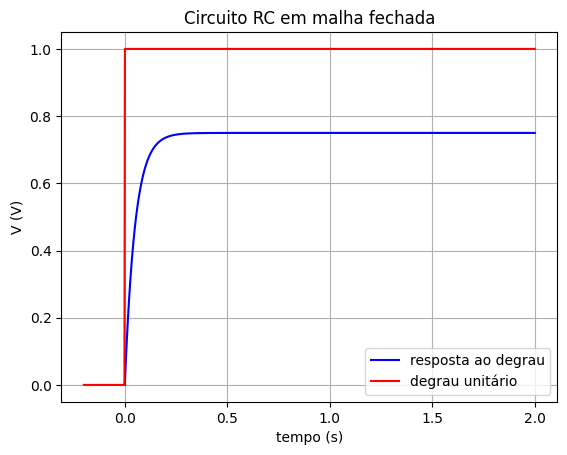

In [ ]:
# plota os resultados
plt.plot(T_mf, yout_mf, 'b-')
plt.plot(T2, degrau, 'r-')
plt.ylabel('V (V)')
plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau', 'degrau unitário'])
plt.title('Circuito RC em malha fechada')
plt.grid()